https://programmers.co.kr/learn/courses/30/lessons/42583

트럭 여러 대가 강을 가로지르는 일차선 다리를 정해진 순으로 건너려 합니다. 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 합니다. 다리에는 트럭이 최대 bridge_length대 올라갈 수 있으며, 다리는 weight 이하까지의 무게를 견딜 수 있습니다. 단, 다리에 완전히 오르지 않은 트럭의 무게는 무시합니다.

예를 들어, 트럭 2대가 올라갈 수 있고 무게를 10kg까지 견디는 다리가 있습니다. 무게가 [7, 4, 5, 6]kg인 트럭이 순서대로 최단 시간 안에 다리를 건너려면 다음과 같이 건너야 합니다.

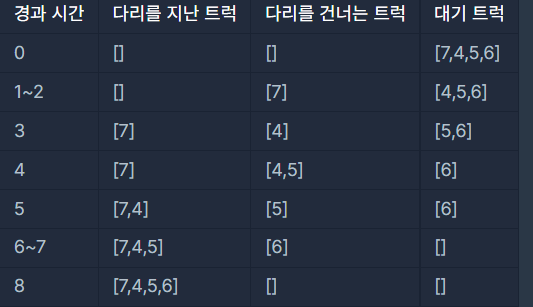

따라서, 모든 트럭이 다리를 지나려면 최소 8초가 걸립니다.

solution 함수의 매개변수로 다리에 올라갈 수 있는 트럭 수 bridge_length, 다리가 견딜 수 있는 무게 weight, 트럭 별 무게 truck_weights가 주어집니다. 이때 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 return 하도록 solution 함수를 완성하세요.

제한 조건
- bridge_length는 1 이상 10,000 이하입니다.
- weight는 1 이상 10,000 이하입니다.
- truck_weights의 길이는 1 이상 10,000 이하입니다.
- 모든 트럭의 무게는 1 이상 weight 이하입니다.

In [ ]:
다리 확인 -  총 무게, 최대 수용가능 트럭 수

In [36]:
bridge_length = 2
weight = 10
truck_weights = [7,4,5,6]
# 8

In [31]:
bridge = [0] * bridge_length
bridge

[0, 0]

In [32]:
truck_weights.reverse()
truck_weights

[6, 5, 4, 7]

In [33]:
def roll_bridge(bridge):
    from collections import deque
    b = deque(bridge)
    b.append(b.popleft()) #왼쪽으로 한번 회전
    bridge = list(b)
    bridge[-1] = 0 #맨 뒤에 0으로 초기화 (도착)
    return bridge

In [8]:
arr = [0,1,2,3,4]
arr = roll_bridge(arr)
arr

[1, 2, 3, 4, 0]

In [34]:
answer = 0
while truck_weights:
    answer += 1 #1초
    bridge = roll_bridge(bridge)
    if sum(bridge) + truck_weights[-1] <= weight and 0 in bridge:
        bridge[-1] = truck_weights.pop()


[0, 7]
[7, 0]
[0, 4]
[4, 5]
[5, 0]
[0, 6]


In [35]:
answer

6

solution - tc5번 시간초과

In [ ]:
def roll_bridge(bridge):
    from collections import deque
    b = deque(bridge)
    b.append(b.popleft()) #왼쪽으로 한번 회전
    bridge = list(b)
    bridge[-1] = 0 #맨 뒤에 0으로 초기화 (도착)
    return bridge

def solution(bridge_length, weight, truck_weights):
    bridge = [0] * bridge_length
    answer = 0
    while truck_weights:
        answer += 1 #1초
        bridge = roll_bridge(bridge)
        if sum(bridge) + truck_weights[-1] <= weight:
            bridge[-1] = truck_weights.pop()
    return answer + bridge_length #대기트럭이 빈 시간 + 마지막 트럭이 다리를 지나는 시간

In [ ]:
def roll_bridge(bridge):
    from collections import deque
    b = deque(bridge)
    b.append(b.popleft()) #왼쪽으로 한번 회전
    bridge = list(b)
    arrive = 0
    if bridge[-1] != 0:
        arrive = bridge[-1]
        bridge[-1] = 0 #맨 뒤에 0으로 초기화 (도착)
    return arrive, bridge

def solution(bridge_length, weight, truck_weights):
    bridge = [0] * bridge_length
    answer = 0
    sum_bridge = 0
    while truck_weights:
        answer += 1 #1초
        arrive, bridge = roll_bridge(bridge)
        sum_bridge -= arrive
        if sum_bridge + truck_weights[-1] <= weight:
            b = truck_weights.pop()
            bridge[-1] = b
            sum_bridge += b
    return answer + bridge_length #대기트럭이 빈 시간 + 마지막 트럭이 다리를 지나는 시간

In [ ]:
def roll_bridge(bridge):
    from collections import deque
    b = deque(bridge)
    b.append(b.popleft()) #왼쪽으로 한번 회전
    bridge = list(b)
    arrive = 0
    if bridge[-1] != 0:
        arrive = bridge[-1]
        bridge[-1] = 0 #맨 뒤에 0으로 초기화 (도착)
    return arrive, bridge

def solution(bridge_length, weight, truck_weights):
    bridge = [0] * bridge_length
    answer = 0
    sum_bridge = 0
    while truck_weights:
        answer += 1 #1초
        arrive, bridge = roll_bridge(bridge)
        if arrive != 0:
            sum_bridge -= arrive
        if sum_bridge + truck_weights[-1] <= weight:
            b = truck_weights.pop()
            bridge[-1] = b
            sum_bridge += b
    return answer + bridge_length #대기트럭이 빈 시간 + 마지막 트럭이 다리를 지나는 시간

In [41]:
def solution(bridge_length, weight, truck_weights):
    from collections import deque
    bridge = deque([0] * bridge_length)
    answer = 0
    sum_bridge = 0
    while truck_weights:
        answer += 1 #1초
        bridge.append(bridge.popleft())
        if bridge[-1] != 0:
            arrive = bridge[-1]
            bridge[-1] = 0 #맨 뒤에 0으로 초기화 (도착)
        if arrive != 0:
            sum_bridge -= arrive
        if sum_bridge + truck_weights[-1] <= weight:
            b = truck_weights.pop()
            bridge[-1] = b
            sum_bridge += b
    return answer + bridge_length #대기트럭이 빈 시간 + 마지막 트럭이 다리를 지나는 시간

3